<a href="https://colab.research.google.com/github/srirampai/Active_learning/blob/main/Banking_7th_March_Clustering_Full_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string
import numpy as np
import logging
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd

In [17]:
train_data = pd.read_csv('Train.csv')
#test_data= pd.read_csv('Test.csv')
#dimensions of the data
print((train_data.shape))
#print((test_data.shape))

(10003, 2)


In [18]:
train_data.head()

,text,label
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


**High level Describe**

In [19]:
train_data.describe()

,text,label
count,10003,10003
unique,10003,77
top,I am still waiting on my card?,card_payment_fee_charged
freq,1,187


**Sperating the text column for text analysis**

Slicing one particular column to form another dataframe.This can be done using iloc

In [20]:
text = train_data.iloc[:,0:1]

In [21]:
print(type(text))


<class 'pandas.core.frame.DataFrame'>


In [22]:
text


,text
0,I am still waiting on my card?
1,What can I do if my card still hasn't arrived ...
2,I have been waiting over a week. Is the card s...
3,Can I track my card while it is in the process...
4,"How do I know if I will get my card, or if it ..."
...,...
9998,You provide support in what countries?
9999,What countries are you supporting?
10000,What countries are getting support?
10001,Are cards available in the EU?


In [13]:
# text = train_data['text']
# print(type(text))

<class 'pandas.core.series.Series'>


In [15]:
# text

0                           I am still waiting on my card?
1        What can I do if my card still hasn't arrived ...
2        I have been waiting over a week. Is the card s...
3        Can I track my card while it is in the process...
4        How do I know if I will get my card, or if it ...
                               ...                        
9998                You provide support in what countries?
9999                    What countries are you supporting?
10000                  What countries are getting support?
10001                       Are cards available in the EU?
10002                     Which countries are represented?
Name: text, Length: 10003, dtype: object

**Formation of Corpus**

In [23]:
#Converting the column of data from excel sheet into a list of documents, where each document corresponds to a group of sentences.
corpus=[]
for index,row in text.iterrows():
    corpus.append(row['text'])

In [24]:
corpus

['I am still waiting on my card?',
 "What can I do if my card still hasn't arrived after 2 weeks?",
 'I have been waiting over a week. Is the card still coming?',
 'Can I track my card while it is in the process of delivery?',
 'How do I know if I will get my card, or if it is lost?',
 'When did you send me my new card?',
 'Do you have info about the card on delivery?',
 'What do I do if I still have not received my new card?',
 'Does the package with my card have tracking?',
 "I ordered my card but it still isn't here",
 'Why has my new card still not come?',
 "I still haven't received my card after two weeks, is it lost?",
 'Can you track my card for me?',
 'Is there a way to track the delivery of my card?',
 "It's been a week since I ordered my card and it's not here. Please help?",
 'Will I be able to track the card that was sent to me?',
 "I don't have my card in 1 week.  Should I be worried?",
 'How do I know when my new card is going to arrive?',
 'My new card has not been deliv

**Vectorisation using Count Vectoriser**

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [29]:
vectorizer.get_feature_names_out()

array(['00', '000', '10', ..., 'youre', 'yours', 'zero'], dtype=object)

**TF_IDF**

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

In [31]:
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape ) 

(10003, 2323)


**Clustering**

In [32]:
from sklearn.cluster import KMeans

In [33]:
num_clusters = 77 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()

In [39]:
print(len(clusters))

10003


**Convert the ouput to list & then to dataframe**

In [40]:
output_text={'text':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
#frame=pd.DataFrame(output_text,index=[clusters], columns=['ext','Cluster']) # Converting it into a dataframe.


In [47]:
frame1=pd.DataFrame(output_text,index=[clusters], columns=['text','Cluster']) # Converting it into a dataframe.

In [ ]:
print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.

In [46]:
print("\n")
print(frame1) #Print the doc with the labeled cluster number.
# print("\n")
# print(frame1['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.



                                                 text  Cluster
45                     I am still waiting on my card?       45
5   What can I do if my card still hasn't arrived ...        5
45  I have been waiting over a week. Is the card s...       45
30  Can I track my card while it is in the process...       30
54  How do I know if I will get my card, or if it ...       54
..                                                ...      ...
39             You provide support in what countries?       39
39                 What countries are you supporting?       39
39                What countries are getting support?       39
69                     Are cards available in the EU?       69
39                   Which countries are represented?       39

[10003 rows x 2 columns]


**Save it to Dataframe**

In [42]:
frame.to_csv("output_clusters.csv")

In [50]:
frame1.to_csv("output_clusters_77_Full_Data.csv")

In [54]:
frame1.drop(frame1.columns[0])

,text,Cluster
45,I am still waiting on my card?,45
5,What can I do if my card still hasn't arrived ...,5
45,I have been waiting over a week. Is the card s...,45
30,Can I track my card while it is in the process...,30
54,"How do I know if I will get my card, or if it ...",54
...,...,...
39,You provide support in what countries?,39
39,What countries are you supporting?,39
39,What countries are getting support?,39
69,Are cards available in the EU?,69


**Output Text Encoding**

In [16]:
from pandas.core.dtypes.cast import convert_dtypes
train_data['label'] =  train_data['label'].astype('category')
train_data['label_id'] = train_data['label'].cat.codes
train_data[100:200]


,text,label,label_id
100,can you share card tracking number?,card_arrival,12
101,I have not received my card and it's been a we...,card_arrival,12
102,Is there a way I can check on the card on rout...,card_arrival,12
103,When will my new card arrive?,card_arrival,12
104,Why haven't I received my new card yet?,card_arrival,12
...,...,...,...
195,I found my lost card. Am I still able to use it?,card_linking,14
196,Will I need a new card or can I put my old car...,card_linking,14
197,Is there a way to link the card i just got?,card_linking,14
198,How do I add a new card?,card_linking,14


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   text      10003 non-null  object  
 1   label     10003 non-null  category
 2   label_id  10003 non-null  int8    
dtypes: category(1), int8(1), object(1)
memory usage: 100.5+ KB


[]

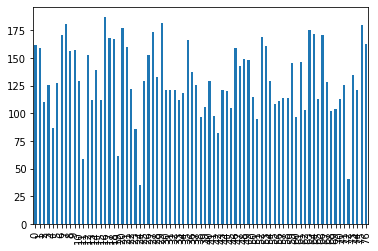

In [20]:
dataplotencoded = train_data['label_id']
figure2 = dataplotencoded.value_counts().sort_index().plot.bar()
figure2.plot(figsize = (100,100))

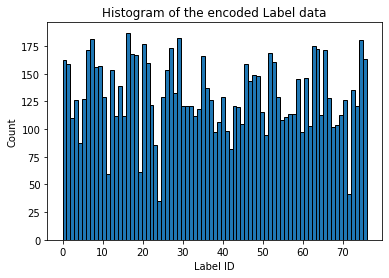

In [32]:
fig1 = plt.hist(dataplotencoded,  edgecolor="black",bins = 77)
plt.title("Histogram of the encoded Label data")
plt.xlabel("Label ID")
plt.ylabel("Count")
plt.show()

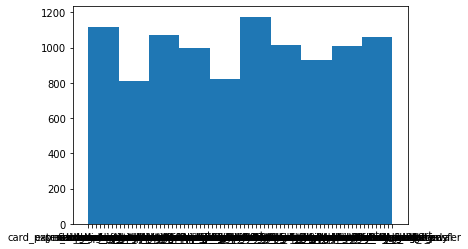

In [22]:
fig2 = plt.hist(dataplot)

***Save the Label encoding as Dictioanry***

In [17]:
id_to_category = pd.Series(train_data.label.values, index = train_data.label_id).to_dict()
id_to_category

{0: 'Refund_not_showing_up',
 1: 'activate_my_card',
 2: 'age_limit',
 3: 'apple_pay_or_google_pay',
 4: 'atm_support',
 5: 'automatic_top_up',
 6: 'balance_not_updated_after_bank_transfer',
 7: 'balance_not_updated_after_cheque_or_cash_deposit',
 8: 'beneficiary_not_allowed',
 9: 'cancel_transfer',
 10: 'card_about_to_expire',
 11: 'card_acceptance',
 12: 'card_arrival',
 13: 'card_delivery_estimate',
 14: 'card_linking',
 15: 'card_not_working',
 16: 'card_payment_fee_charged',
 17: 'card_payment_not_recognised',
 18: 'card_payment_wrong_exchange_rate',
 19: 'card_swallowed',
 20: 'cash_withdrawal_charge',
 21: 'cash_withdrawal_not_recognised',
 22: 'change_pin',
 23: 'compromised_card',
 24: 'contactless_not_working',
 25: 'country_support',
 26: 'declined_card_payment',
 27: 'declined_cash_withdrawal',
 28: 'declined_transfer',
 29: 'direct_debit_payment_not_recognised',
 30: 'disposable_card_limits',
 31: 'edit_personal_details',
 32: 'exchange_charge',
 33: 'exchange_rate',
 34: 

In [33]:
import json
with open('categorymappingJSON.txt','w') as convert_file:
      convert_file.write(json.dumps(id_to_category))

**Pool separation**

In [ ]:
# assemble initial data
n_initial = 8000
pool_data = train_data.iloc[-2000:]
#training_data = train_data.iloc[:n_initial]

#training_data.shape


In [ ]:
#df.iloc[-3:]
pool_data.shape


(2000, 3)

In [ ]:
pool_data.head()

,text,label,label_id
8003,Where can I deposit cash to top up?,top_up_by_cash_or_cheque,58
8004,Is there an option to top up with a cheque?,top_up_by_cash_or_cheque,58
8005,"Help, I need to top up my account. Where do I ...",top_up_by_cash_or_cheque,58
8006,I'll send a check to top up my account,top_up_by_cash_or_cheque,58
8007,Is it possible for me to top up with a cheque?,top_up_by_cash_or_cheque,58


In [ ]:
training_data = train_data.iloc[:8000]
training_data.shape

(8000, 3)

In [ ]:
training_data

,text,label,label_id
0,I am still waiting on my card?,card_arrival,12
1,What can I do if my card still hasn't arrived ...,card_arrival,12
2,I have been waiting over a week. Is the card s...,card_arrival,12
3,Can I track my card while it is in the process...,card_arrival,12
4,"How do I know if I will get my card, or if it ...",card_arrival,12
...,...,...,...
7995,I wish to be able to top up with cash.,top_up_by_cash_or_cheque,58
7996,Where do I top up?,top_up_by_cash_or_cheque,58
7997,Do you accept cheques for top-up?,top_up_by_cash_or_cheque,58
7998,How do I use a check to top up?,top_up_by_cash_or_cheque,58


**Training data = Train Data + Pool data**

In [ ]:
train_data = training_data
train_data

,text,label,label_id
0,I am still waiting on my card?,card_arrival,12
1,What can I do if my card still hasn't arrived ...,card_arrival,12
2,I have been waiting over a week. Is the card s...,card_arrival,12
3,Can I track my card while it is in the process...,card_arrival,12
4,"How do I know if I will get my card, or if it ...",card_arrival,12
...,...,...,...
7995,I wish to be able to top up with cash.,top_up_by_cash_or_cheque,58
7996,Where do I top up?,top_up_by_cash_or_cheque,58
7997,Do you accept cheques for top-up?,top_up_by_cash_or_cheque,58
7998,How do I use a check to top up?,top_up_by_cash_or_cheque,58


In [ ]:
from sklearn.model_selection import train_test_split
features, targets = train_data['text'], train_data['label_id']
pool_features , pool_targets = pool_data['text'], pool_data['label_id']

train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.7,
        test_size=0.3,
        random_state=42,
        shuffle = True,
        stratify=targets
    )

In [ ]:
train_features.values[:5]

array(['How long do I have to wait for Europe transfers?',
       "I can't remember my app code, can you reset it?",
       'I have some transactions on my account I did not make. Can you cancel my card and prevent further use.',
       'The app does not know it is me.', 'Can I use American Express?'],
      dtype=object)

In [ ]:
train_targets.values[:5]

array([67, 45, 23, 68, 54], dtype=int8)

**Tensor Flow pipeline**
Prepare Tensor Flow pipeline

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
import re
import string
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow import keras

In [ ]:
# train X & y -- RAW still in string 
train_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_features.values, tf.string)
) 
train_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_targets.values, tf.int64),

) 
# test X & y
test_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_features.values, tf.string)
) 
test_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_targets.values, tf.int64),

) 

#pool X & Y
pool_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(pool_features.values, tf.string)
) 
pool_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(pool_targets.values, tf.int64),

) 


**Decide the dictionary size and the review size**

In [ ]:
vocab_size = 20000  # Only consider the top 20K words
max_len = 50  # Maximum review (text) size in words

**Text Vectorisation**

In [ ]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    return tf.strings.regex_replace(
        stripped_html, f"[{re.escape(string.punctuation)}]", ""
    )

In [ ]:
input_data = "Ive been trying to use my card for two weeks now to purchase somethings online but nothing is going through. It keeps returning my payment to my account. There shouldn't be anything wrong with my account, is it the card?"
output_dummy_string = custom_standardization(input_data)
print("output is:", output_dummy_string.numpy().decode("utf=8"))

output is: ive been trying to use my card for two weeks now to purchase somethings online but nothing is going through it keeps returning my payment to my account there shouldnt be anything wrong with my account is it the card


In [ ]:
# # VECTORISATION
# vectorize_layer = layers.TextVectorization(
#     3000, standardize=custom_standardization, output_sequence_length=150
# )

In [ ]:
# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size+2,
    output_mode="int",
    output_sequence_length=max_len,
)

***APPLY KERAS TEXTVECTORIZATION ***

In [ ]:
def convert_text_input(sample):
    text = sample
    text = tf.expand_dims(text, -1)  
    #return tf.squeeze(vectorize_layer(text))
    return tf.squeeze(vectorize_layer(text)) 

In [ ]:
# Train X
train_text_ds = train_text_ds_raw.map(convert_text_input, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
# Test X
test_text_ds = test_text_ds_raw.map(convert_text_input, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)




In [ ]:
# Pool
pool_text_ds = pool_text_ds_raw.map(convert_text_input, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [ ]:
# # Train X
# train_text_ds = convert_text_input(train_features)
# # Test X
# test_text_ds = convert_text_input(test_features)

# #  POOL X
# pool_text_ds_raw = convert_text_input(pool_features)

In [ ]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ", vocab[word])

for X in train_features[:2]:
  print(" Given raw data: " )
  print(X)
  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" Tokenized and Transformed to a vector of integers: " )
  print (tokenized)
  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed)

NameError: ignored

**MODEL LSTM KERAS**

In [ ]:
# build function for the Keras' scikit-learn API
def create_model():
    model = keras.models.Sequential(
        [
            layers.Input(shape=(150,)),
            layers.Embedding(input_dim=3000, output_dim=128),
            layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
            layers.GlobalMaxPool1D(),
            layers.Dense(20, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(1, activation="sigmoid"),
         
        ]
        
    )
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['AUC'])
    model.summary()
    return model


In [ ]:
!pip install modAL

**Training the Active Leaner**

In [ ]:
pip install scikeras[tensorflow]

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from modAL.models import ActiveLearner

In [ ]:
# create the classifier
classifier = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
#classifier = create_model()

In [ ]:
classifier

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7fb37a9e7560>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=150
	class_weight=None
)

In [ ]:
import tensorflow as tf
#tf.enable_eager_execution()

# train_text_numpy = train_text_ds.numpy()
ds_numpy = train_text_ds.as_numpy()
print((ds_numpy))

AttributeError: ignored

In [ ]:
ds_numpy = tfds.as_numpy(train_text_ds)
print(type(ds_numpy))
 

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


**Training**

In [ ]:
type(train_text_ds)

tensorflow.python.data.ops.dataset_ops.ParallelMapDataset

In [ ]:
train_ds = tf.data.Dataset.zip(
    (
            train_text_ds,
            train_cat_ds_raw
     )
) 

In [ ]:
pool_ds = tf.data.Dataset.zip(
    (
            pool_text_ds,
            pool_cat_ds_raw
     )
) 

In [ ]:
batch_size = 64
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size= train_ds.cardinality().numpy()

train_ds = train_ds.shuffle(buffer_size=buffer_size)\
                   .batch(batch_size=batch_size,drop_remainder=True)\
                   .cache()\
                   .prefetch(AUTOTUNE)

pool_ds = pool_ds.shuffle(buffer_size=buffer_size)\
                   .batch(batch_size=batch_size,drop_remainder=True)\
                   .cache()\
                   .prefetch(AUTOTUNE)

In [ ]:
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

In [ ]:
classifier1 = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          384000    
                                                                 
 bidirectional (Bidirectiona  (None, 150, 64)          41216     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 20)                1300      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [ ]:
classifier1.fit(train_ds, verbose=1, epochs=3)

Epoch 1/3


FailedPreconditionError: ignored

In [ ]:
classifier.fit(train_ds, verbose =1, epochs =2)

TypeError: ignored

In [ ]:

# initialize ActiveLearner
learner = ActiveLearner(
    estimator=classifier,
    X_training= train_text_ds, y_training= (train_targets),verbose=1
)

ValueError: ignored

**active learning**

In [ ]:
# the active learning loop
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = learner.query(pool_data_Vectorised, n_instances=100, verbose=0)
    print(query_idx)
    learner.teach(
        X=pool_data_Vectorised[query_idx], y=pool_cat_ds_raw[query_idx], only_new=True,
        verbose=1
    )
    # remove queried instance from pool
    pool_text_ds_raw = np.delete(pool_text_ds_raw, query_idx, axis=0)
    pool_cat_ds_raw = np.delete(pool_cat_ds_raw, query_idx, axis=0)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = learner.query(pool_data_Vectorised, n_instances=100, verbose=0)
    print(query_idx)
    learner.teach(
        X=X_pool[query_idx], y=y_pool[query_idx], only_new=True,
        verbose=1
    )
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx, axis=0)